## TASK 04
## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
dt = pd.read_csv('TASK 04.csv', names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)
dt.head(10)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [37]:
dt.tail(10)

,ID,Topic,Sentiment,Tweet
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [38]:
dt.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [39]:
dt.index

RangeIndex(start=0, stop=74682, step=1)

In [40]:
dt.shape

(74682, 4)

In [41]:
dt.size

298728

In [42]:
dt.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [43]:
dt.isna().sum()

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [45]:
sid = SentimentIntensityAnalyzer()

In [48]:
def analyze_sentiment(text):
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return 0.0

dt['Sentiment_Score'] = dt['Tweet'].apply(analyze_sentiment)

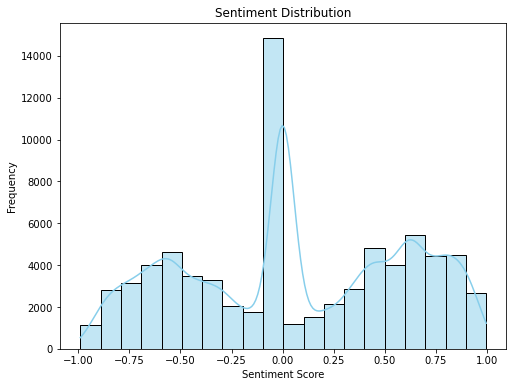

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(dt['Sentiment_Score'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

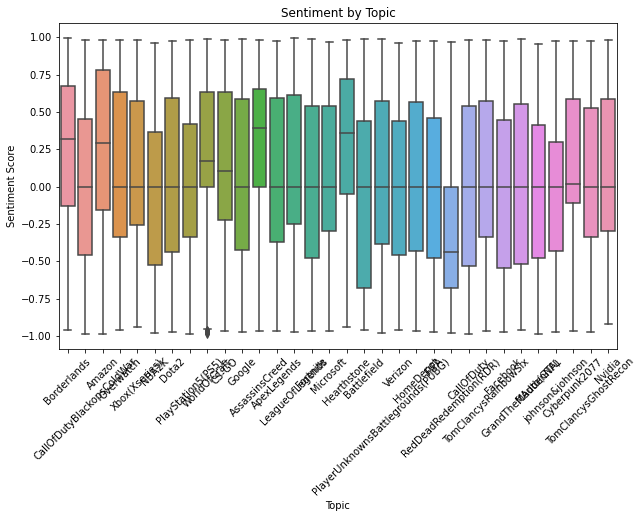

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt, x='Topic', y='Sentiment_Score')
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()